# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [53]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv('passengers.csv')
df = df.set_index(pd.to_datetime(df['Month']))

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [54]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries, window=12):
    
    rm = timeseries.rolling(window).mean()
    rs = timeseries.rolling(window).std()
    
    timeseries.plot(label='Original')
    rm.dropna().plot(label='Rolling Mean')
    rs.dropna().plot(label='Rolling Std')
    
    if adfuller(timeseries)[1] <= 0.05:
        print("Stationary: \nWith pval {0}, we can reject the null hypothesis".format(adfuller(timeseries)[1]))
    else:
        print("Not stationary: \nWith pval {0}, we cannot reject the null hypothesis".format(adfuller(timeseries)[1]) )

Use your newly created function on the airpassenger data set.

Not stationary: 
With pval 0.9918802434376409, we cannot reject the null hypothesis


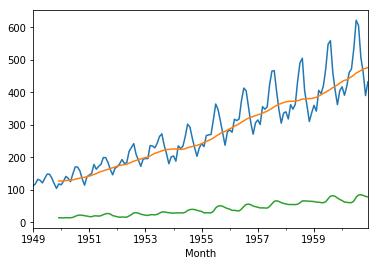

In [55]:
# Code here
check_stationarity(df['#Passengers'])

## Perform a log() and sqrt() transform

Not stationary: 
With pval 0.4223667747703857, we cannot reject the null hypothesis


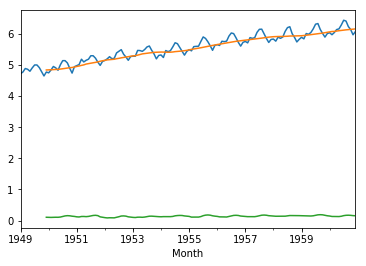

In [56]:
import numpy as np
# Log transform timeseries and compare with original to check the effect
log_data = np.log(df['#Passengers'])

check_stationarity(log_data)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

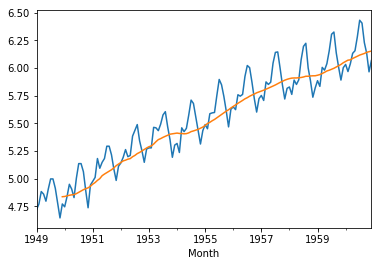

In [57]:
# your code here
rm_log = log_data.rolling(window=12).mean()

log_data.plot()
rm_log.plot()

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

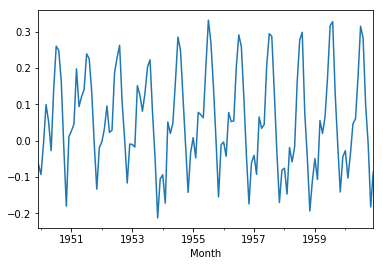

In [58]:
# Subtract the moving average from the original data and check head for Nans
log_minus_rmlog = log_data - rm_log
log_minus_rmlog.dropna(inplace=True)
log_minus_rmlog.plot()

In [59]:
# Drop the NaN values from timeseries calculated above


In [60]:
# Plot the result


Finally, use your function `check_stationarity` to see if this series is considered stationary!

Stationary: 
With pval 0.022234630001243844, we can reject the null hypothesis


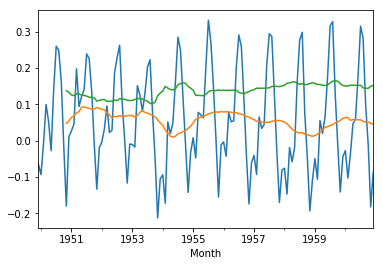

In [61]:
# Your code here
check_stationarity(log_minus_rmlog)

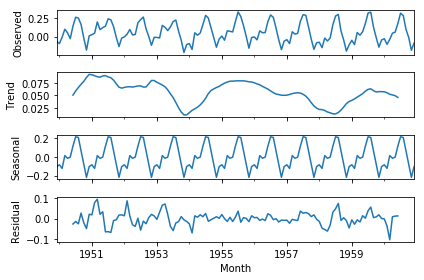

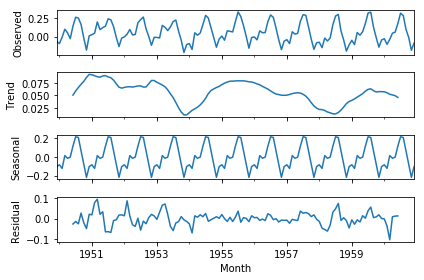

In [83]:
seasonal_decompose(log_minus_rmlog.dropna()).plot()

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?

See above. It's stationary.

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

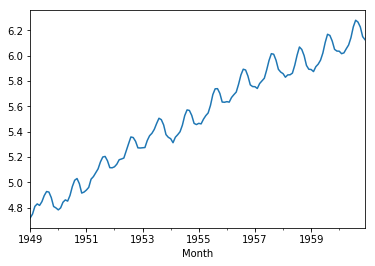

In [68]:

# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
log_ewm = log_data.ewm(halflife= 2).mean()
# Plot the original data with exp weighted average
log_ewm.plot()

In [69]:
# Subtract the moving average from the original data and plot
log_ewm_minus_rm = log_ewm - log_ewm.rolling(window=12).mean()

Stationary: 
With pval 0.004918545053082648, we can reject the null hypothesis


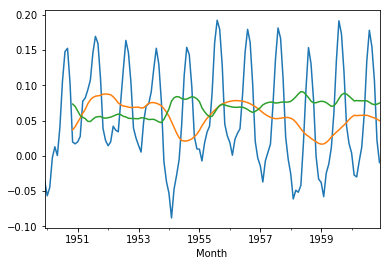

In [71]:
# do a stationarity check
check_stationarity(log_ewm_minus_rm.dropna())

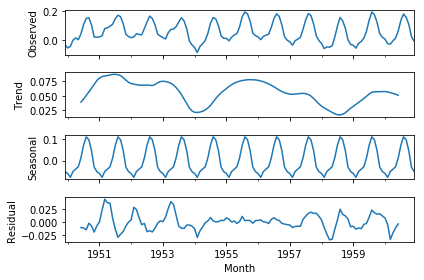

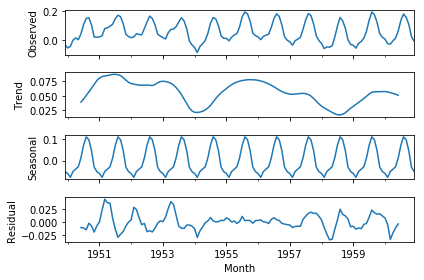

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(log_ewm_minus_rm.dropna()).plot()

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [84]:
# difference your data and look at the head
shift1 = log_ewm_minus_rm.dropna() - log_ewm_minus_rm.dropna().shift(1)

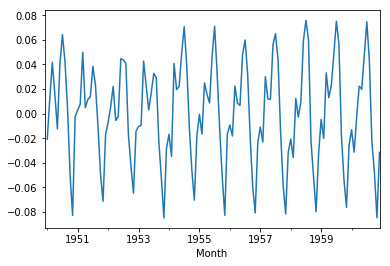

In [85]:
# plot your differenced time series
shift1.plot()

In [86]:
# drop nas
shift1=shift1.dropna()

Stationary: 
With pval 0.0034217880172344715, we can reject the null hypothesis


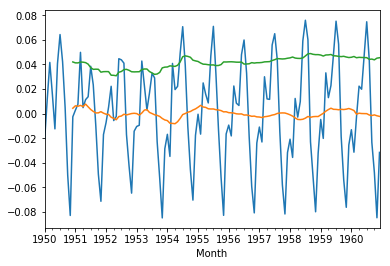

In [87]:
# perform the stationarity check
check_stationarity(shift1)

### Your conclusion

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.